### Import, %matplotlib inline is needed to display the graph within the notebook

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

%reload_ext autoreload
%autoreload 2

## Functional plot

Text(0, 0.5, 'Squares')

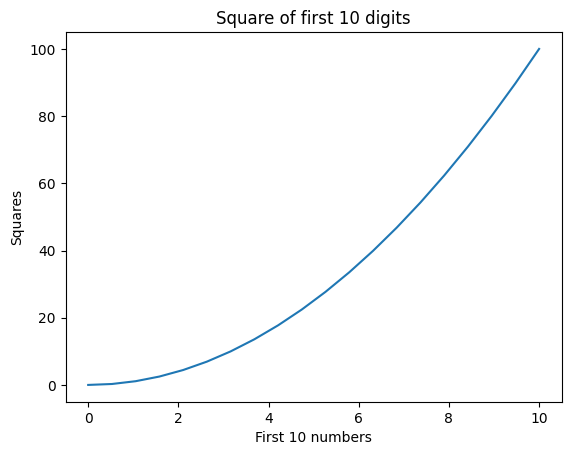

In [91]:
x1=np.linspace(0,10,20)
y1=x1**2
plt.plot(x1,y1)
plt.title("Square of first 10 digits")
plt.xlabel("First 10 numbers")
plt.ylabel("Squares")

## Print multiple plots

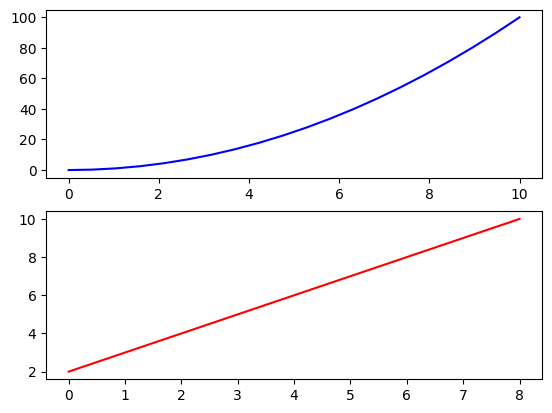

In [92]:
x2=np.arange(0,10,2)
y2=x2+2
plt.subplot(2,1,2)
plt.plot(x2,y2, 'r')
plt.subplot(2,1,1)
plt.plot(x1,y1, 'b')

## Using figure objects

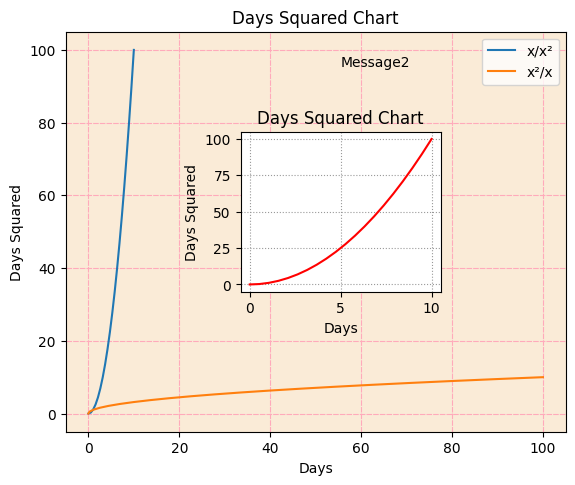

In [93]:
fig_1 = plt.figure(figsize=(5,4),dpi=100)
axes1 = fig_1.add_axes([0.1,0.1,1,1])
axes1.set_xlabel("Days")
axes1.set_ylabel("Days Squared")
axes1.set_title("Days Squared Chart")
axes1.plot(x1,y1,label='x/x²')
axes1.plot(y1,x1,label='x²/x')
axes1.legend(loc=0)

axes2 = fig_1.add_axes([0.45,0.45,0.4,0.4])
axes2.set_title("Days Squared Chart")
axes2.set_xlabel("Days")
axes2.set_ylabel("Days Squared")
axes2.plot(x1,y1,'r')
axes2.text(5,150,'Message2')
axes1.grid(True, dashes=(5,1,5,1), color='#FAB7')
axes2.grid(True, color='0.6', ls='dotted')
axes1.set_facecolor('#FAEBD7')


## Subplots

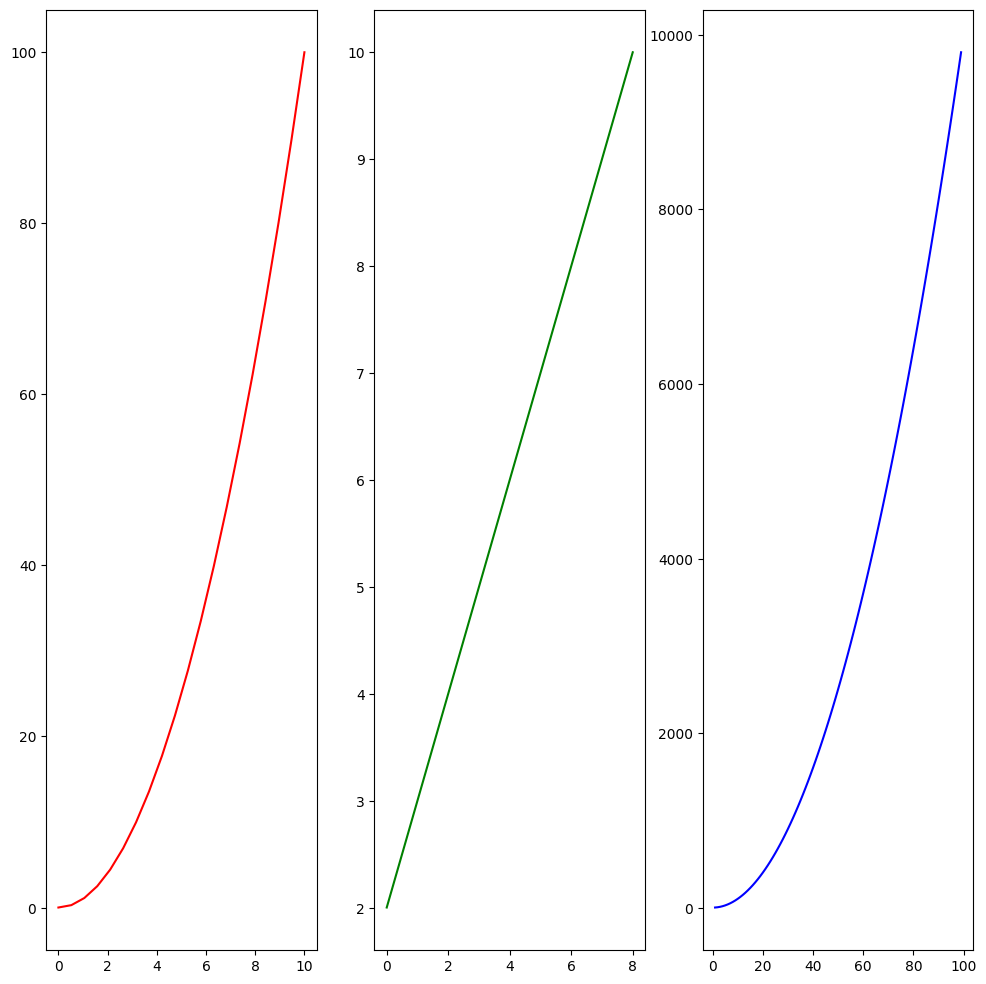

In [94]:
fig_2, axes3 = plt.subplots(figsize=(10,10), nrows=1, ncols=3)
plt.tight_layout()
axes3[0].plot(x1,y1,'r')
axes3[1].plot(x2,y2,'g')
x3 = np.arange(1,100)
y3 = list(x**2 for x in x3)
axes3[2].plot(x3, y3, 'b')
# plt.subplots(**kargs,nrows,ncols): the function returns 2 objects 
# 1. figure object and 2. axes object 
# Helps us to create one or more axes in a single figure object. More axes helps in more plots

## Appearance Options

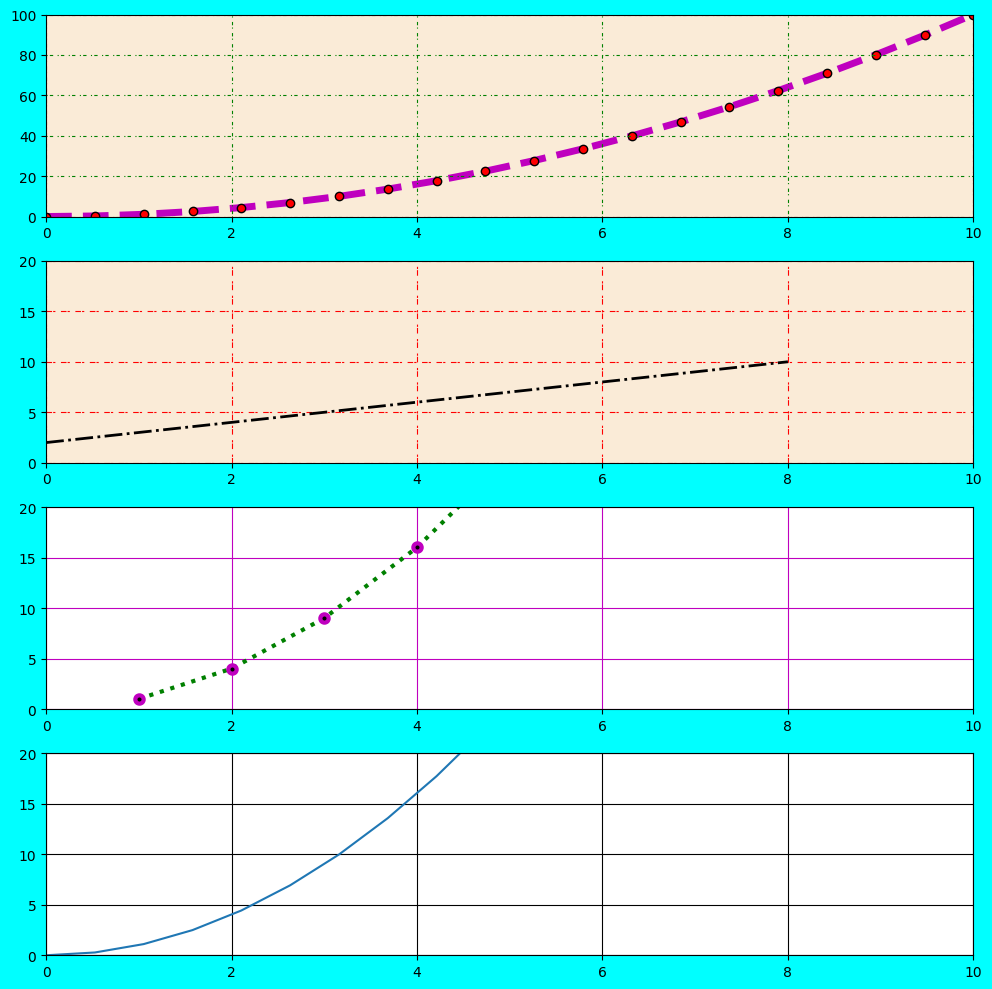

In [95]:
fig_3 , axes_3 = plt.subplots(figsize=(10,10), facecolor="cyan", dpi = 100, nrows = 4, ncols=1)
plt.tight_layout()
axes_3[0].plot(x1,y1, 'm', alpha=1, lw=5, ls="--", marker="o", markerfacecolor='red', 
               markeredgecolor='k',markeredgewidth=1,zorder=1)
axes_3[1].plot(x2,y2, color="black", alpha=1, lw=2, ls='dashdot')#solid dashed dashdot, dotted
axes_3[2].plot(x3,y3, color="green", alpha=1, lw=3, ls='dotted', markeredgewidth=3, markeredgecolor='m', markerfacecolor='black',marker='o', 
               zorder=2)
axes_3[3].plot(x1,y1)
axes_3[0].set_xlim([0,10])
axes_3[0].set_ylim([0,100])
axes_3[1].set_xlim([0,10])
axes_3[1].set_ylim([0,20])
axes_3[2].set_xlim([0,10])
axes_3[2].set_ylim([0,20])
axes_3[3].set_xlim([0,10])
axes_3[3].set_ylim([0,20])
axes_3[0].grid(True, color='green', dashes=(1,2,3,4), zorder=2)
"""
the dashes parameter is set to (1, 2, 3, 4). This means that the dashed line will consist of four segments, with the first dash being 1 unit 
long, the first gap 2 units long, the second dash 3 units long, and the second gap 4 units long, and this pattern will repeat along the line.
"""
axes_3[1].grid(True, color='r', dashes=(5,1,2,5))
axes_3[2].grid(True, color='m', zorder=1) 
axes_3[3].grid(True, color='k')
axes_3[0].set_facecolor('#FAEBD7')
axes_3[1].set_facecolor('#FAEBD7')

## Save the figure to the file 

In [96]:
fig_1.savefig("1st_and_2nd_plot.png")
fig_3.savefig("appeareance_options.png")

## Working with Pandas DataFrame

* Firstly making file in csv format 

In [97]:
dict1 = {"Temperature":np.array([30,62,49,9,75,40,50,35]), "Sales":np.array([100,783,446,80,999,330,502,np.nan])}
df = pd.DataFrame(dict1)
df.to_csv("icecream.csv", index=False)
df

,Temperature,Sales
0,30,100.0
1,62,783.0
2,49,446.0
3,9,80.0
4,75,999.0
5,40,330.0
6,50,502.0
7,35,NaN


* Secondly plotting the data and predicting the Nan cell

Text(50, 950, 'Good Sales')

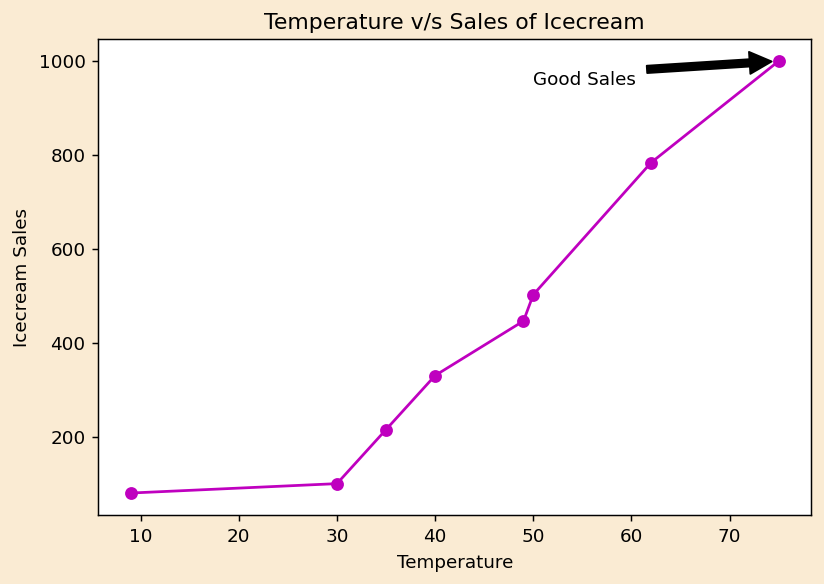

In [98]:
ice_df = pd.read_csv("icecream.csv")
ice_df.sort_values(by='Temperature', inplace=True)
# Dealing with the Nan value 
ice_df.interpolate(inplace=True)
np_arr = ice_df.values
x_1 = np_arr[:,0]
y_1 = np_arr[:,1]
fig_4 = plt.figure(figsize=(6,4), dpi=132, facecolor='#FAEBD3')
axes_4 = fig_4.add_axes([0.1,0.1,0.9,0.9])
axes_4.set_title('Temperature v/s Sales of Icecream')
axes_4.set_xlabel('Temperature', size=10)
axes_4.set_ylabel('Icecream Sales', size=10)
# axes_4.set_xlim([0,100])
# axes_4.set_ylim([0,1000])
axes_4.plot(x_1,y_1,color='m', marker='o')
axes_4.annotate('Good Sales', xy=(75,999), xytext=(50,950), arrowprops=dict(facecolor='black', shrink=0.05))


* 'Good Sales': This is the text that will be displayed as the annotation.
* xy=(65, 999): This is the position where the arrow will point to. It specifies the data coordinates (x, y) of the point you want to annotate.
* xytext=(55, 950): This is the position of the text. It specifies the data coordinates (x, y) where you want to place the annotation text.
* arrowprops={'facecolor':'black','shrink':0.05}: This is a dictionary of arrow properties that customize the appearance of the arrow. The 'facecolor':'black' sets the color of the arrow to black, and 'shrink':move the tip and base 5% of total length of arrow away from the annotated point and text.

## TeX Markup

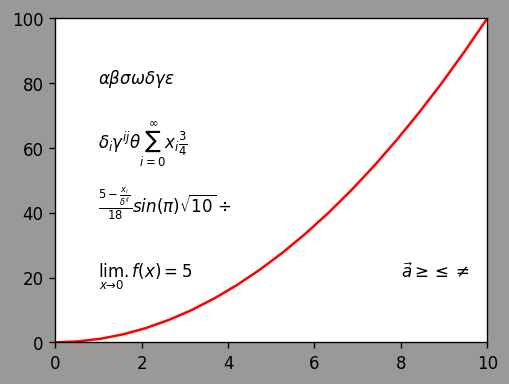

In [99]:
# To put the math symbols or any other extra text or symbols we should use axes.text() method.
fig_5 = plt.figure(figsize=(4,3), dpi=120, frameon=True, facecolor='0.6')
axes_5 = fig_5.add_axes([0.1,0.1,0.9,0.9])
axes_5.text(1,80, r'$\alpha \beta \sigma \omega \delta \gamma \epsilon$') # Writing math symbols using attribute "r'$\math_symbol_name$'
axes_5.text(1,60, r'$\delta_{i} \gamma^{ij} \theta \sum_{i=0}^\infty x_i \frac{3}{4}$')
axes_5.text(1,40, r'$\frac{5 - \frac{x_i}{\delta^{ij}}}{18} sin(\pi) \sqrt{10} \div$')
axes_5.text(1,20, r'$\lim_{x \to 0} .f(x)=5$')
axes_5.text(8,20, r'$\vec {a} \geq \leq \neq$')
axes_5.set_xlim(0,10)
axes_5.set_ylim(0,100)
axes_5.plot(x1,y1, color='red')
fig_5.savefig("symbols.png")

## Histograms

(array([ 224.,  453.,  675.,  817., 1086., 1334., 1122.,  928.,  642.,
         478.,  241.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 [<matplotlib.patches.Polygon at 0x23fc7196350>])

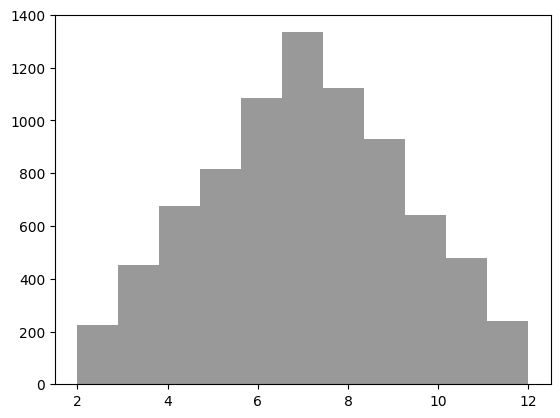

In [100]:
arr_1 = np.random.randint(1,7,8000)
arr_2 = np.random.randint(1,7,8000)
arr_3 = arr_1 + arr_2
plt.hist(arr_3, bins=11, density=False, stacked=True, color='0.6', histtype='stepfilled', cumulative=False)

